In [1]:
#Python 3.6
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\Ninjacart\\Returns Analysis(Customer Fraud Detection)")

In [3]:
returnfile=pd.read_csv("Returns2monthsDump-Master.csv")
returnfile=pd.DataFrame(returnfile)

In [4]:
customer=returnfile.CustomerId.unique()
report=[]
for i in range(len(customer)):
    customerdata=returnfile[returnfile.CustomerId==customer[i]]
    customerdata=pd.DataFrame(customerdata)
    date=customerdata.DeliveryDate.unique()
    for j in range(len(date)):
        data=customerdata[customerdata.DeliveryDate==date[j]]
        data=pd.DataFrame(data)
        nsku=len(data)
        count_infavour=0
        count_fraud=0
        nreturn=0
        for k in data.index.values:
            if(data['ReturnQty'][k]!=0):
                nreturn=nreturn+1
                if(data.Code[k]==4 or data.Code[k]==5 or data.Code[k]==7 or data.Code[k]==9):
                    count_fraud=count_fraud+1
                else:
                    count_infavour=count_infavour+1
        report.append([customer[i],date[j],nsku,nreturn,count_infavour,count_fraud])
report=pd.DataFrame(report,columns=['CustomerId','DeliveryDate','Number of SKU ordered','Total Returns','Returns in Favour','Fraud Return'])
report

,CustomerId,DeliveryDate,Number of SKU ordered,Total Returns,Returns in Favour,Fraud Return
0,2716,4/22/2017,35,0,0,0
1,2716,4/23/2017,33,0,0,0
2,2716,4/24/2017,30,0,0,0
3,2716,4/25/2017,32,0,0,0
4,2716,4/26/2017,31,0,0,0
5,2716,4/27/2017,26,0,0,0
6,2716,4/28/2017,36,0,0,0
7,2716,4/29/2017,33,2,2,0
8,2716,4/30/2017,28,2,2,0
9,2716,5/1/2017,18,0,0,0


In [5]:
customer=pd.DataFrame(customer)
returnlistCustWise=[]
for i in customer.index.values:
    customerdata=report[report.CustomerId==customer.ix[i].item()]
    norders=len(customerdata)
    n_fraud=len(customerdata[customerdata['Fraud Return']!=0])
    nreturn=len(customerdata[customerdata['Total Returns']!=0 ])
    returnlistCustWise.append([customer.ix[i].item(),norders,nreturn,n_fraud,n_fraud/norders])
returnlistCustWise=pd.DataFrame(returnlistCustWise,columns=['CustomerId','Total times ordered','Total Returns','Fraud Returns','Fraud Return%'])
returnlistCustWise

,CustomerId,Total times ordered,Total Returns,Fraud Returns,Fraud Return%
0,2716,69,42,2,0.028986
1,2717,69,43,14,0.202899
2,2719,69,39,3,0.043478
3,2720,69,14,4,0.057971
4,2721,69,60,27,0.391304
5,2723,69,64,31,0.449275
6,2960,69,62,31,0.449275
7,2961,69,68,35,0.507246
8,2962,69,66,38,0.550725
9,2963,69,43,20,0.289855


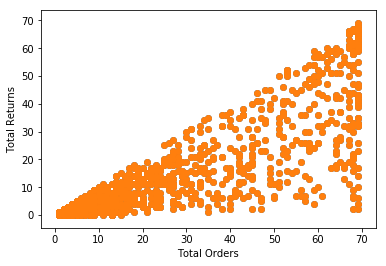

In [16]:
plt.scatter(returnlistCustWise['Total times ordered'],returnlistCustWise['Total Returns'])
plt.xlabel('Total Orders')
plt.ylabel('Total Returns')
plt.show()

In [7]:
fraudCustlist=[]
for i in range(0,len(returnlistCustWise)):
    if(returnlistCustWise['Fraud Return%'][i]>np.percentile(returnlistCustWise['Fraud Return%'],80)):
        fraudCustlist.append([returnlistCustWise['CustomerId'][i],returnlistCustWise['Total times ordered'][i],returnlistCustWise['Fraud Returns'][i],returnlistCustWise['Fraud Return%'][i]])
fraudCustlist=pd.DataFrame(fraudCustlist,columns=['CustomerId','Total times orderd','Fraud Returns','Fraud Return%'])
fraudCustlist

,CustomerId,Total times orderd,Fraud Returns,Fraud Return%
0,2723,69,31,0.449275
1,2960,69,31,0.449275
2,2961,69,35,0.507246
3,2962,69,38,0.550725
4,3071,69,40,0.579710
5,3070,69,41,0.594203
6,3084,69,33,0.478261
7,3073,69,32,0.463768
8,3066,69,50,0.724638
9,3090,69,38,0.550725


In [8]:
#locality
locality=returnfile.Locality.unique()
locality=pd.DataFrame(locality)
localityreport=[]
for i in locality.index.values:
    localitydata=returnfile[returnfile.Locality==locality.ix[i].item()]
    localitydata=pd.DataFrame(localitydata)
    customer=localitydata.CustomerId.unique()
    customer=pd.DataFrame(customer)
    for j in customer.index.values:
        customerdata=localitydata[localitydata.CustomerId==customer.ix[j].item()]
        customerdata=pd.DataFrame(customerdata)
        date=customerdata.DeliveryDate.unique()
        date=pd.DataFrame(date)
        for k in date.index.values:
            datespec=customerdata[customerdata.DeliveryDate==date.ix[k].item()]
            datespec=pd.DataFrame(datespec)
            nsku=len(datespec)
            countfavour=0
            countfraud=0
            nreturn=0
            for l in datespec.index.values:
                if(datespec['ReturnQty'][l]!=0):
                    nreturn=nreturn+1
                    if(datespec['Code'][l]==4 or datespec['Code'][l]==5 or datespec['Code'][l]==7 or datespec['Code'][l]==9):
                        countfraud=countfraud+1
                    else:
                        countfavour=countfavour+1
            localityreport.append([locality.ix[i].item(),customer.ix[j].item(),date.ix[k].item(),nsku,nreturn,countfavour,countfraud])
                    
localityreport=pd.DataFrame(localityreport,columns=['Locality','CustomerId','Date','Total Sku ordered','Total sku returned','Return supporting customer','Fraud Return'])
localityreport

,Locality,CustomerId,Date,Total Sku ordered,Total sku returned,Return supporting customer,Fraud Return
0,JP Nagar 2,2716,4/22/2017,35,0,0,0
1,JP Nagar 2,2716,4/23/2017,33,0,0,0
2,JP Nagar 2,2716,4/24/2017,30,0,0,0
3,JP Nagar 2,2716,4/25/2017,32,0,0,0
4,JP Nagar 2,2716,4/26/2017,31,0,0,0
5,JP Nagar 2,2716,4/27/2017,26,0,0,0
6,JP Nagar 2,2716,4/28/2017,36,0,0,0
7,JP Nagar 2,2716,4/29/2017,33,2,2,0
8,JP Nagar 2,2716,4/30/2017,28,2,2,0
9,JP Nagar 2,2716,5/1/2017,18,0,0,0


In [9]:
localityspec=localityreport.Locality.unique()
localityspec=pd.DataFrame(localityspec)
fraudlocality=[]
for i in localityspec.index.values:
    data=localityreport[localityreport.Locality==localityspec.ix[i].item()]
    norders=len(data)
    nreturn=len(data[data['Total sku returned']!=0])
    returnfavour=len(data[data['Return supporting customer']!=0])
    returnfraud=len(data[data['Fraud Return']!=0])
    fraudlocality.append([localityspec.ix[i].item(),norders,nreturn,returnfavour,returnfraud])
fraudlocality=pd.DataFrame(fraudlocality,columns=['Locality','Total orders','Total Returns','Return in favour of Customer','Fraud return'])
fraudlocality

,Locality,Total orders,Total Returns,Return in favour of Customer,Fraud return
0,JP Nagar 2,501,340,284,123
1,Kadubeesanahalli,505,238,181,93
2,Banashankari South,1326,810,678,296
3,Thanisandra,601,253,184,121
4,Thurahalli Forest,101,75,72,28
5,Cox Town,69,64,59,31
6,Indiranagar,482,253,202,106
7,Banashankari North,634,476,438,199
8,AECS Layout,183,149,135,71
9,Nagarbhavi,982,429,331,208


In [10]:
skulocality=[]
for i in locality.index.values:
    localitydata=returnfile[returnfile.Locality==locality.ix[i].item()]
    localitydata=pd.DataFrame(localitydata)
    sku=localitydata.SKUId.unique()
    sku=pd.DataFrame(sku)
    for j in sku.index.values:
        skuspec=localitydata[localitydata.SKUId==sku.ix[j].item()]
        skuspec=pd.DataFrame(skuspec)
        norders=len(skuspec)
        nreturn=0
        nfavour=0
        nfraud=0
        for k in skuspec.index.values:
            if(skuspec['ReturnQty'][k]!=0):
                nreturn=nreturn+1
                if(skuspec['Code'][k]==4 or skuspec['Code'][k]==5 or skuspec['Code'][k]==7 or skuspec['Code'][k]==9):
                    nfraud=nfraud+1
                else:
                    nfavour=nfavour+1
        skulocality.append([locality.ix[i].item(),sku.ix[j].item(),norders,nreturn,nfavour,nfraud,nfraud/norders])

skulocality=pd.DataFrame(skulocality,columns=['Locality','SKUId','Total orders','Total returns','Returns supporting customer','Fraud Return','fraud%'])
skulocality

,Locality,SKUId,Total orders,Total returns,Returns supporting customer,Fraud Return,fraud%
0,JP Nagar 2,1835,14,6,1,5,0.357143
1,JP Nagar 2,99,73,16,16,0,0.000000
2,JP Nagar 2,2108,125,18,15,3,0.024000
3,JP Nagar 2,144,125,26,20,6,0.048000
4,JP Nagar 2,43,282,34,28,6,0.021277
5,JP Nagar 2,1883,17,0,0,0,0.000000
6,JP Nagar 2,10,121,19,13,6,0.049587
7,JP Nagar 2,14,142,21,17,4,0.028169
8,JP Nagar 2,13,67,4,4,0,0.000000
9,JP Nagar 2,16,131,22,19,3,0.022901


In [11]:
topfraudSkuData=[]
for i in skulocality.index.values:
    if(skulocality['fraud%'][i]>np.percentile(skulocality['fraud%'],95)):
        topfraudSkuData.append([skulocality['Locality'][i],skulocality['SKUId'][i],skulocality['Total orders'][i],skulocality['Total returns'][i],skulocality['Returns supporting customer'][i],skulocality['Fraud Return'][i],skulocality['fraud%'][i]])
topfraudSkuData=pd.DataFrame(topfraudSkuData,columns=['Locality','SKUId','Total orders','Total returns','Returns supporting customer','Fraud Return','fraud%'])
topfraudSkuData

,Locality,SKUId,Total orders,Total returns,Returns supporting customer,Fraud Return,fraud%
0,JP Nagar 2,1835,14,6,1,5,0.357143
1,JP Nagar 2,121,50,20,12,8,0.160000
2,JP Nagar 2,124,22,10,3,7,0.318182
3,JP Nagar 2,2081,18,9,6,3,0.166667
4,JP Nagar 2,35,10,2,0,2,0.200000
5,JP Nagar 2,88,18,7,4,3,0.166667
6,JP Nagar 2,140,9,5,2,3,0.333333
7,JP Nagar 2,1932,3,1,0,1,0.333333
8,JP Nagar 2,1464,16,6,3,3,0.187500
9,JP Nagar 2,1933,4,2,0,2,0.500000


In [12]:
customer=returnfile.CustomerId.unique()
customer=pd.DataFrame(customer)
skucustomer=[]
for i in customer.index.values:
    customerdata=returnfile[returnfile.CustomerId==customer.ix[i].item()]
    customerdata=pd.DataFrame(customerdata)
    sku=customerdata.SKUId.unique()
    sku=pd.DataFrame(sku)
    for j in sku.index.values:
        skuspec=customerdata[customerdata.SKUId==sku.ix[j].item()]
        skuspec=pd.DataFrame(skuspec)
        norders=len(skuspec)
        nreturn=0
        nfavour=0
        nfraud=0
        for k in skuspec.index.values:
            if(skuspec['ReturnQty'][k]!=0):
                nreturn=nreturn+1
                if(skuspec['Code'][k]==4 or skuspec['Code'][k]==5 or skuspec['Code'][k]==7 or skuspec['Code'][k]==9):
                    nfraud=nfraud+1
                else:
                    nfavour=nfavour+1
        skucustomer.append([customer.ix[i].item(),sku.ix[j].item(),norders,nreturn,nfavour,nfraud,nfraud/norders])

skucustomer=pd.DataFrame(skucustomer,columns=['CustomerId','SKUId','Total orders','Total returns','Returns supporting customer','Fraud Return','fraud%'])
skucustomer

,CustomerId,SKUId,Total orders,Total returns,Returns supporting customer,Fraud Return,fraud%
0,2716,1835,4,0,0,0,0.000000
1,2716,99,69,16,16,0,0.000000
2,2716,2108,10,0,0,0,0.000000
3,2716,144,12,0,0,0,0.000000
4,2716,43,65,5,5,0,0.000000
5,2716,1883,17,0,0,0,0.000000
6,2716,10,57,8,7,1,0.017544
7,2716,14,42,3,3,0,0.000000
8,2716,13,50,2,2,0,0.000000
9,2716,16,52,5,5,0,0.000000


In [13]:
topfraudcustomerskuData=[]
for i in skucustomer.index.values:
    if(skucustomer['fraud%'][i]>np.percentile(skucustomer['fraud%'],95)):
        topfraudcustomerskuData.append([skucustomer['CustomerId'][i],skucustomer['SKUId'][i],skucustomer['Total orders'][i],skucustomer['Total returns'][i],skucustomer['Returns supporting customer'][i],skucustomer['Fraud Return'][i],skucustomer['fraud%'][i]])
topfraudcustomerskuData=pd.DataFrame(topfraudcustomerskuData,columns=['CustomerId','SKUId','Total orders','Total returns','Returns supporting customer','Fraud Return','fraud%'])
topfraudcustomerskuData

,CustomerId,SKUId,Total orders,Total returns,Returns supporting customer,Fraud Return,fraud%
0,2961,1941,9,8,4,4,0.444444
1,2961,1938,5,5,2,3,0.600000
2,2961,1939,26,15,5,10,0.384615
3,2962,2108,17,12,5,7,0.411765
4,3070,2111,35,30,11,19,0.542857
5,3068,8,2,1,0,1,0.500000
6,3068,1835,2,2,1,1,0.500000
7,3073,2108,14,13,6,7,0.500000
8,3066,2108,17,14,8,6,0.352941
9,3090,2108,17,16,8,8,0.470588


In [14]:
#Basket Size analysis

date=returnfile.DeliveryDate.unique()
date=pd.DataFrame(date)
basketdata=[]
for i in date.index.values:
    datedata=returnfile[returnfile.DeliveryDate==date.ix[i].item()]
    datedata=pd.DataFrame(datedata)
    customer=datedata.CustomerId.unique()
    customer=pd.DataFrame(customer)
    for j in customer.index.values:
        customerdata=datedata[datedata.CustomerId==customer.ix[j].item()]
        customerdata=pd.DataFrame(customerdata)
        beforereturn=0
        afterreturn=0
        truereturn=0
        fraudreturn=0
        fraudreturnfactor=0
        truereturnfactor=0
        for k in customerdata.index.values:
            beforereturn=beforereturn + customerdata['BilledQty'][k]*customerdata['SalePrice'][k]
            afterreturn=afterreturn + (customerdata['BilledQty'][k]-customerdata['ReturnQty'][k])*customerdata['SalePrice'][k]
            if(customerdata['ReturnQty'][k]!=0):
                if(customerdata['Code'][k]==4 or customerdata['Code'][k]==5 or customerdata['Code'][k]==7 or customerdata['Code'][k]==9):
                    fraudreturnfactor=fraudreturnfactor+customerdata['ReturnQty'][k]*customerdata['SalePrice'][k]
                else:
                    truereturnfactor=truereturnfactor+customerdata['ReturnQty'][k]*customerdata['SalePrice'][k]
        truereturn=beforereturn-truereturnfactor
        fraudreturn=beforereturn-(truereturnfactor+fraudreturnfactor)
        nreturn=0
        nfraudreturn=0
        if(afterreturn<beforereturn):
            for k in customerdata.index.values:
                if(customerdata['ReturnQty'][k]!=0):
                    nreturn=nreturn+1
                    if(customerdata['Code'][k]==4 or customerdata['Code'][k]==5 or customerdata['Code'][k]==7 or customerdata['Code'][k]==9 ):
                        nfraudreturn=nfraudreturn+1
        basketdata.append([date.ix[i].item(),customer.ix[j].item(),beforereturn,afterreturn,truereturn,fraudreturn,nreturn,nfraudreturn])

basketdata=pd.DataFrame(basketdata,columns=['DeliveryDate','CustomerId','Basket value before return','Basket value after return','Basket value after true return','Basket Vaue after false return','TotalReturn','Fraud Return'])
basketdata

,DeliveryDate,CustomerId,Basket value before return,Basket value after return,Basket value after true return,Basket Vaue after false return,TotalReturn,Fraud Return
0,4/22/2017,2716,3345.50,3345.500,3345.500,3345.500,0,0
1,4/22/2017,2717,3862.50,3862.500,3862.500,3862.500,0,0
2,4/22/2017,2719,5413.00,5413.000,5413.000,5413.000,0,0
3,4/22/2017,2720,5871.50,5871.500,5871.500,5871.500,0,0
4,4/22/2017,2721,7746.50,6776.500,7534.000,6776.500,8,2
5,4/22/2017,2723,5069.60,4938.950,4938.950,4938.950,3,0
6,4/22/2017,2960,16341.60,15616.600,15736.600,15616.600,4,1
7,4/22/2017,2961,12735.50,11392.000,11392.000,11392.000,7,0
8,4/22/2017,2962,11984.00,11065.600,11635.600,11065.600,9,3
9,4/22/2017,2963,11621.50,11599.000,11621.500,11599.000,1,1


In [15]:
#Steep price increase
customer=returnfile.CustomerId.unique()
returndata=[]
claim="True"
for i in range(len(customer)):
    customerdata=returnfile[returnfile.CustomerId==customer[i]]
    sku=customerdata.SKUId.unique()
    for j in range(len(sku)):
        skudata=customerdata[customerdata.SKUId==sku[j]]
        skudata=skudata.reset_index(drop=True)
        for k in range(len(skudata)):
            if(skudata['ReturnQty'][k]!=0 and k>1):
                if(skudata['Code'][k]==4 or skudata['Code'][k]==5 or skudata['Code'][k]==7 or skudata['Code'][k]==9 ):
                    claim="False"
                else:
                    claim="True"
                salepricetoday=skudata['SalePrice'][k]
                avgsalepricelasttwotimes=(skudata['SalePrice'][k-1]+skudata['SalePrice'][k-2])/2.0
                returndata.append([customer[i],sku[j],skudata['DeliveryDate'][k],salepricetoday,avgsalepricelasttwotimes,claim])

returndata=pd.DataFrame(returndata,columns=['CustomerId','SKUId','DeliveryDate','Sale Price Today','Average Sale Price Last 2 times ','Claim'])
returndata

,CustomerId,SKUId,DeliveryDate,Sale Price Today,Average Sale Price Last 2 times,Claim
0,2716,99,5/14/2017,54.0,53.50,True
1,2716,99,5/16/2017,51.0,53.00,True
2,2716,99,5/18/2017,51.0,51.00,True
3,2716,99,5/20/2017,53.0,51.00,True
4,2716,99,5/23/2017,50.0,50.00,True
5,2716,99,5/29/2017,50.0,51.00,True
6,2716,99,6/3/2017,55.0,52.50,True
7,2716,99,6/4/2017,56.0,54.00,True
8,2716,99,6/5/2017,56.0,55.50,True
9,2716,99,6/9/2017,55.0,52.50,True
